<a href="https://colab.research.google.com/github/Janya-Sharma-22/graph_realworld-DAA/blob/main/graph_realworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install memory_profiler matplotlib

In [ ]:
# Problem 1: Social Network Friend Suggestion using BFS

from collections import deque

def suggest_friends(graph, user):
    visited = set()
    queue = deque([(user, 0)])
    friends_of_friends = set()

    while queue:
        node, depth = queue.popleft()
        if depth == 2:
            friends_of_friends.add(node)
        elif depth < 2:
            for neighbor in graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, depth + 1))

    return friends_of_friends - set(graph[user]) - {user}

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

user = 'A'
print(f"Suggested friends for {user}: {suggest_friends(graph, user)}")


Suggested friends for A: {'F', 'E', 'D'}


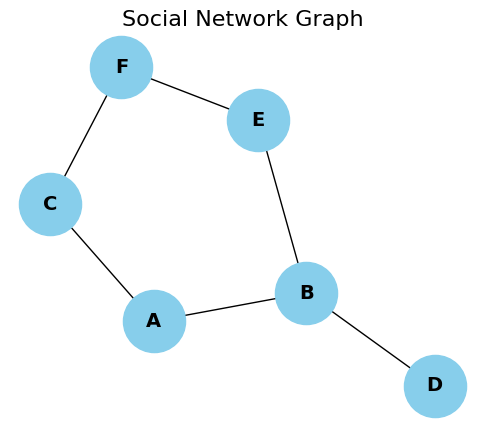

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for user, friends in graph.items():
    for friend in friends:
        G.add_edge(user, friend)

plt.figure(figsize=(6, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, font_weight='bold')
plt.title("Social Network Graph", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
from collections import deque

def suggest_friends(graph, user):
    visited = set([user])
    queue = deque([(user, 0)])
    friends_of_friends = set()

    while queue:
        current, depth = queue.popleft()
        if depth >= 2:
            continue

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, depth + 1))
                if depth == 0:
                    continue
                friends_of_friends.add(neighbor)

    return friends_of_friends - set(graph[user]) - {user}

In [ ]:
user = 'A'
suggested = suggest_friends(graph, user)
print(f"Suggested friends for {user}: {suggested}")

Suggested friends for A: {'F', 'E', 'D'}


In [ ]:
''' Time Complexity & Scalability

- Traversal Complexity: O(V + E)
  - V = number of users (nodes)
  - E = number of friendships (edges)

- Space Complexity: O(V) for the visited set + queue.

Scalability:
- Works efficiently for thousands of users since BFS explores locally.
- For huge networks (millions of users), we’d use adjacency sets, limit search depth, or parallelize friend lookups. '''


' Time Complexity & Scalability\n\n- **Traversal Complexity:** O(V + E)  \n  - V = number of users (nodes)  \n  - E = number of friendships (edges)\n\n- **Space Complexity:** O(V) for the visited set + queue.  \n\n**Scalability:**  \n- Works efficiently for thousands of users since BFS explores locally.  \n- For huge networks (millions of users), we’d use adjacency sets, limit search depth, or parallelize friend lookups. '

In [ ]:
# Problem 2: Route Finding (Bellman-Ford Algorithm)

edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', -3),
    ('B', 'D', 2),
    ('C', 'D', 3),
    ('D', 'B', 1)
]

vertices = sorted(set([u for u, v, w in edges] + [v for u, v, w in edges]))

print("Vertices:", vertices)
print("Edges (u, v, w):")
for e in edges:
    print(e)

Vertices: ['A', 'B', 'C', 'D']
Edges (u, v, w):
('A', 'B', 4)
('A', 'C', 2)
('B', 'C', -3)
('B', 'D', 2)
('C', 'D', 3)
('D', 'B', 1)


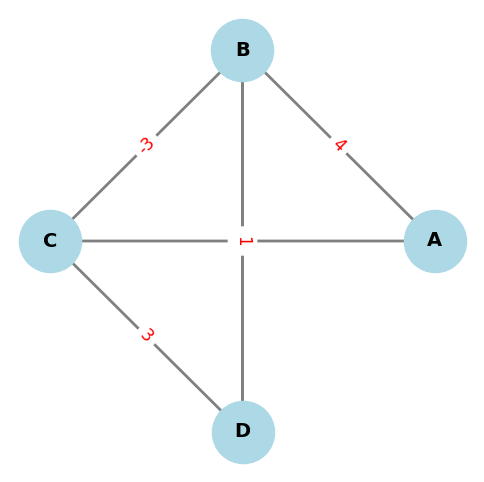

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.circular_layout(G)

plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.axis('off')
plt.show()

In [ ]:
def bellman_ford(vertices, edges, source):
    distance = {v: float('inf') for v in vertices}
    distance[source] = 0

    for _ in range(len(vertices) - 1):
        for u, v, w in edges:
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    negative_cycle = False
    for u, v, w in edges:
        if distance[u] + w < distance[v]:
            negative_cycle = True
            print(f"⚠️ Negative weight cycle detected involving edge ({u}, {v}, {w})")
            break

    return distance, negative_cycle


In [ ]:
source = 'A'
distances, has_cycle = bellman_ford(vertices, edges, source)

if not has_cycle:
    print(f"\nShortest distances from source '{source}':")
    for v in vertices:
        print(f"{source} → {v} = {distances[v]}")
else:
    print("\nCannot compute shortest paths due to negative weight cycle.")


Shortest distances from source 'A':
A → A = 0
A → B = 4
A → C = 1
A → D = 4


In [ ]:
''' Analysis

**Time Complexity:**
- Bellman-Ford runs in **O(V × E)** time
  (since it relaxes all edges V−1 times).

**Space Complexity:**
- O(V) for the distance table.

**Why Bellman-Ford?**
- Unlike Dijkstra’s algorithm, it safely handles **negative edge weights**.
- It can detect **negative-weight cycles**, where distances keep decreasing.

**Scalability:**
- Slower than Dijkstra (O(V × E) vs. O(E log V)).
- Works best for **moderate-sized graphs** where negative weights are possible.

**Use Case Example:**
In a navigation app, Bellman-Ford can handle routes where some roads offer toll refunds or time credits (negative weights), making it more versatile. '''

' Analysis\n\n**Time Complexity:**  \n- Bellman-Ford runs in **O(V × E)** time  \n  (since it relaxes all edges V−1 times).\n\n**Space Complexity:**  \n- O(V) for the distance table.\n\n**Why Bellman-Ford?**\n- Unlike Dijkstra’s algorithm, it safely handles **negative edge weights**.\n- It can detect **negative-weight cycles**, where distances keep decreasing.\n\n**Scalability:**\n- Slower than Dijkstra (O(V × E) vs. O(E log V)).\n- Works best for **moderate-sized graphs** where negative weights are possible.\n\n**Use Case Example:**  \nIn a navigation app, Bellman-Ford can handle routes where some roads offer toll refunds or time credits (negative weights), making it more versatile. '

In [ ]:
''' Problem 3: Emergency Response (Dijkstra’s Algorithm)

Objective:
Use **Dijkstra’s Algorithm** to find the fastest route for emergency vehicles (ambulance, fire truck, etc.) across a **positively weighted road network**.

Real-world context:
In a city map, each road (edge) has a travel time (weight).
We must compute the **shortest-time path** from the emergency base (source node) to all other intersections.

Key concepts:
- Works only with positive weights
- Uses a priority queue (min-heap) for efficiency
- Ideal for disaster response and navigation apps '''


' Problem 3: Emergency Response (Dijkstra’s Algorithm)\n\nObjective: \nUse **Dijkstra’s Algorithm** to find the fastest route for emergency vehicles (ambulance, fire truck, etc.) across a **positively weighted road network**.\n\nReal-world context:\nIn a city map, each road (edge) has a travel time (weight).  \nWe must compute the **shortest-time path** from the emergency base (source node) to all other intersections.\n\nKey concepts:\n- Works only with positive weights  \n- Uses a priority queue (min-heap) for efficiency  \n- Ideal for disaster response and navigation apps '

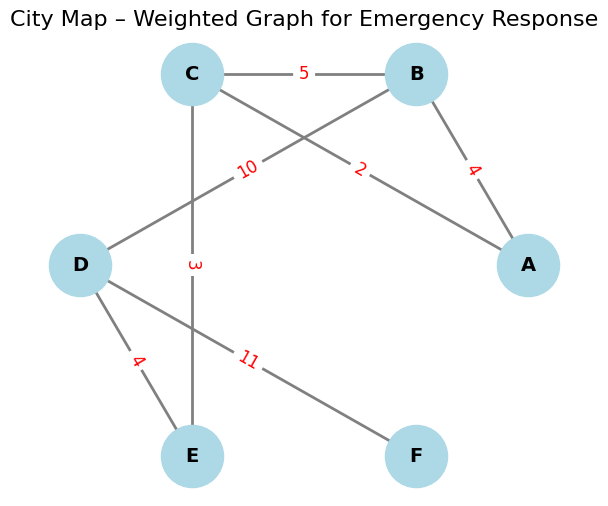

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

city_graph = nx.Graph()

roads = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'E', 3),
    ('E', 'D', 4),
    ('D', 'F', 11)
]

city_graph.add_weighted_edges_from(roads)

pos = nx.circular_layout(city_graph)

plt.figure(figsize=(7,6))
nx.draw_networkx_nodes(city_graph, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(city_graph, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(city_graph, pos, font_size=14, font_weight='bold')

edge_labels = nx.get_edge_attributes(city_graph, 'weight')
nx.draw_networkx_edge_labels(city_graph, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("City Map – Weighted Graph for Emergency Response", fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
import heapq

def dijkstra(graph, start):

    distances = {node: float('inf') for node in graph.nodes()}
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        current_dist, current_node = heapq.heappop(pq)

        if current_dist > distances[current_node]:
            continue

        for neighbor, data in graph[current_node].items():
            weight = data['weight']
            distance = current_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

In [ ]:
source = 'A'
shortest_paths = dijkstra(city_graph, source)

print(f"🚑 Shortest travel times from source '{source}':")
for node, dist in shortest_paths.items():
    print(f"{source} → {node} = {dist}")

🚑 Shortest travel times from source 'A':
A → A = 0
A → B = 4
A → C = 2
A → D = 9
A → E = 5
A → F = 20


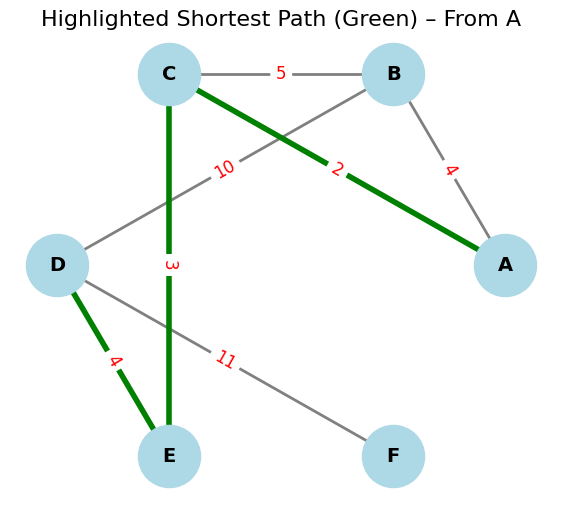

In [ ]:
highlight_edges = [('A','C'), ('C','E'), ('E','D')]

plt.figure(figsize=(7,6))
nx.draw_networkx_nodes(city_graph, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(city_graph, pos, width=2, edge_color='gray')
nx.draw_networkx_edges(city_graph, pos, edgelist=highlight_edges, width=4, edge_color='green')
nx.draw_networkx_labels(city_graph, pos, font_size=14, font_weight='bold')
nx.draw_networkx_edge_labels(city_graph, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("Highlighted Shortest Path (Green) – From A", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
''' Analysis

**Time Complexity:**
- Using a min-heap (priority queue): **O(E log V)**
- Very efficient for large graphs with positive weights.

**Space Complexity:** O(V)

**Why Dijkstra?**
- Guarantees the shortest path for all nodes if weights ≥ 0.
- Much faster than Bellman-Ford when no negative weights exist.

**In practice:**
Used in GPS systems, emergency response apps, and disaster management to find optimal routes for vehicles.

**Limitation:**
Fails when negative edge weights exist (would give incorrect results).
'''

In [ ]:
''' Problem 4: Network Cable Installation (MST – Prim's / Kruskal's)

**Objective:**
Find the **minimum total cable length** required to connect all offices (nodes) in a network using **Minimum Spanning Tree (MST)** algorithms — **Prim’s** or **Kruskal’s**.

**Real-world context:**
Telecom or IT infrastructure planning — connecting all offices, routers, or data centers using **the least total cable cost**, while ensuring all remain connected and no cycles are formed.

**Key Concepts:**
- MST connects **all vertices** with **minimum total weight** and **no cycles**.
- Applicable algorithms:
  - **Prim’s Algorithm** → Greedy approach using a priority queue.
  - **Kruskal’s Algorithm** → Edge-sorting + Union-Find structure.'''

" Problem 4: Network Cable Installation (MST – Prim's / Kruskal's)\n\n**Objective:**  \nFind the **minimum total cable length** required to connect all offices (nodes) in a network using **Minimum Spanning Tree (MST)** algorithms — **Prim’s** or **Kruskal’s**.\n\n**Real-world context:**  \nTelecom or IT infrastructure planning — connecting all offices, routers, or data centers using **the least total cable cost**, while ensuring all remain connected and no cycles are formed.\n\n**Key Concepts:**\n- MST connects **all vertices** with **minimum total weight** and **no cycles**.\n- Applicable algorithms:\n  - **Prim’s Algorithm** → Greedy approach using a priority queue.\n  - **Kruskal’s Algorithm** → Edge-sorting + Union-Find structure."

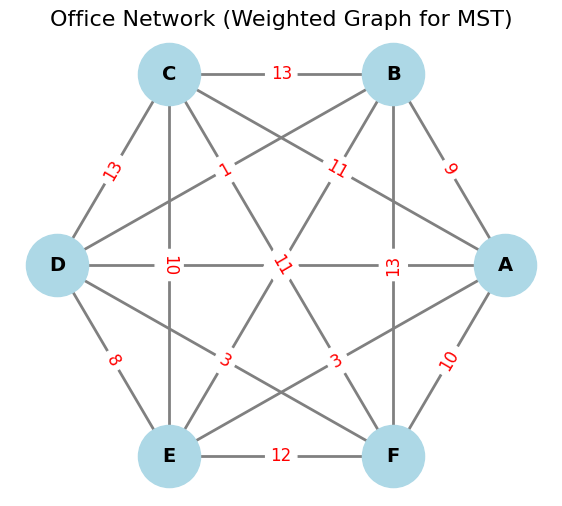

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

office_graph = nx.Graph()

offices = ['A', 'B', 'C', 'D', 'E', 'F']
edges = []

for i in range(len(offices)):
    for j in range(i+1, len(offices)):
        weight = random.randint(1, 15)
        edges.append((offices[i], offices[j], weight))

office_graph.add_weighted_edges_from(edges)

pos = nx.circular_layout(office_graph)

plt.figure(figsize=(7,6))
nx.draw_networkx_nodes(office_graph, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(office_graph, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(office_graph, pos, font_size=14, font_weight='bold')

edge_labels = nx.get_edge_attributes(office_graph, 'weight')
nx.draw_networkx_edge_labels(office_graph, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("Office Network (Weighted Graph for MST)", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
import heapq

def prim_mst(graph, start):
    visited = set()
    min_heap = [(0, start, None)]
    total_cost = 0
    mst_edges = []

    while min_heap:
        weight, current, prev = heapq.heappop(min_heap)
        if current in visited:
            continue
        visited.add(current)

        if prev is not None:
            mst_edges.append((prev, current, weight))
            total_cost += weight

        for neighbor, data in graph[current].items():
            if neighbor not in visited:
                heapq.heappush(min_heap, (data['weight'], neighbor, current))

    return total_cost, mst_edges

🏢 Minimum Spanning Tree (Starting from 'A')
Total Cable Cost: 21

Edges in MST:
A — E : 3
A — D : 4
D — B : 1
D — F : 3
E — C : 10


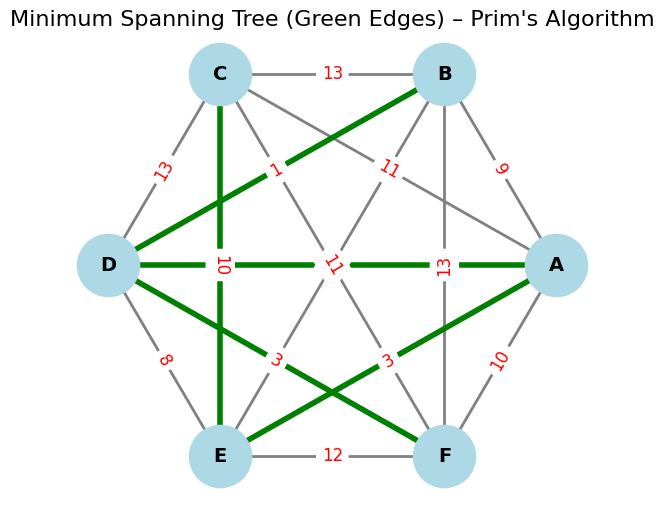

In [ ]:
source = 'A'
total_cost, mst_edges = prim_mst(office_graph, source)

print(f"🏢 Minimum Spanning Tree (Starting from '{source}')")
print(f"Total Cable Cost: {total_cost}\n")
print("Edges in MST:")
for u, v, w in mst_edges:
    print(f"{u} — {v} : {w}")

plt.figure(figsize=(7,6))
nx.draw_networkx_nodes(office_graph, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(office_graph, pos, edgelist=office_graph.edges(), width=2, edge_color='gray')
nx.draw_networkx_edges(office_graph, pos, edgelist=[(u, v) for u, v, w in mst_edges], width=4, edge_color='green')
nx.draw_networkx_labels(office_graph, pos, font_size=14, font_weight='bold')
nx.draw_networkx_edge_labels(office_graph, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title("Minimum Spanning Tree (Green Edges) – Prim's Algorithm", fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
''' Analysis

**Algorithm Used:** Prim’s Algorithm (Greedy)

**Time Complexity:**
- Using a min-heap → **O(E log V)**
  (E = number of edges, V = number of vertices)

**Space Complexity:** O(V + E)

**Why Prim’s Algorithm?**
- Excellent for **dense graphs** (many possible connections).
- Builds the MST incrementally by always adding the next minimum-weight edge that connects to the growing tree.

**Alternative (Kruskal’s Algorithm):**
- Sorts all edges first (O(E log E)), uses Union-Find to avoid cycles.
- Better for **sparse graphs**.

**Real-world Use Case:**
Used in telecom & IT infrastructure to **minimize wiring costs**, or in electrical grids to **minimize transmission distance**.

**Limitation:**
Doesn’t consider bandwidth, capacity, or real-world obstacles — focuses purely on minimal total cost.'''

' Analysis\n\n**Algorithm Used:** Prim’s Algorithm (Greedy)\n\n**Time Complexity:**  \n- Using a min-heap → **O(E log V)**  \n  (E = number of edges, V = number of vertices)\n\n**Space Complexity:** O(V + E)\n\n**Why Prim’s Algorithm?**  \n- Excellent for **dense graphs** (many possible connections).  \n- Builds the MST incrementally by always adding the next minimum-weight edge that connects to the growing tree.\n\n**Alternative (Kruskal’s Algorithm):**  \n- Sorts all edges first (O(E log E)), uses Union-Find to avoid cycles.  \n- Better for **sparse graphs**.\n\n**Real-world Use Case:**  \nUsed in telecom & IT infrastructure to **minimize wiring costs**, or in electrical grids to **minimize transmission distance**.\n\n**Limitation:**  \nDoesn’t consider bandwidth, capacity, or real-world obstacles — focuses purely on minimal total cost.'

# **Design and Analysis of Algorithms Lab: Assignment 3**
### Name: Janya Sharma
### Program: BCA (AI & DS), Semester V
### Instructor: Dr. Aarti Sangwan
### Course Code: ENCA351

# **Overview**

*This project demonstrates how core graph algorithms (BFS, DFS, Bellman-Ford, Dijkstra, and MST algorithms) can be applied to real-world problems such as social networking, navigation, emergency routing, and infrastructure planning.
Each problem maps a real-world scenario into a graph data structure and uses an appropriate algorithm to solve it efficiently.*

---

### **🧩 Problem 1 – Social Network Friend Suggestion (BFS / DFS)**

Goal:
Recommend new friends in a social network based on mutual connections (friends-of-friends).

Algorithm Used:
Breadth-First Search (BFS)

Approach:
Represent users as nodes and friendships as undirected edges.
Perform BFS from a given user up to depth 2 (to find friends-of-friends).
Exclude direct friends and the user themselves.

Time Complexity: O(V + E)
Space Complexity: O(V)

Real-World Applications:
Used by Facebook, LinkedIn, and Instagram to recommend mutual friends.

---

### **🧩 Problem 2 – Route Finding (Bellman-Ford Algorithm)**

Goal:
Find the shortest path between locations even when some road segments have negative weights (e.g., discounts or reversed tolls).

Algorithm Used:
Bellman-Ford

Approach:
Model cities as nodes and roads as directed weighted edges.
Relax all edges V–1 times to compute shortest distances.
Detect and report negative weight cycles.

Time Complexity: O(V × E)
Space Complexity: O(V)

Why Bellman-Ford?
Handles negative edge weights.
Detects negative cycles.

Real-World Applications:
Used in routing protocols like RIP (Routing Information Protocol) and navigation systems handling variable travel costs.

---

## #**🧩 Problem 3 – Emergency Response (Dijkstra’s Algorithm)**

Goal:
Determine the fastest route for an emergency vehicle to reach any location, assuming all roads have positive travel times.

Algorithm Used:
Dijkstra’s Algorithm (with Min-Heap)

Approach:
Represent intersections as nodes and roads as weighted edges.
Use a priority queue to repeatedly expand the nearest node.
Calculate minimum travel times from the emergency base to all others.

Time Complexity: O(E log V)
Space Complexity: O(V + E)

Why Dijkstra?
Extremely efficient for large graphs with positive weights.
Works perfectly for real-time navigation and disaster response systems.

---

### **🧩 Problem 4 – Network Cable Installation (MST – Prim’s / Kruskal’s)**

Goal:
Connect all office buildings with minimum total cable length, avoiding redundant connections.

Algorithm Used:
Prim’s Algorithm (Greedy)

Approach:
Represent offices as nodes and potential cable paths as weighted edges.
Start from any node and grow the MST by always selecting the minimum-weight edge that connects to an unvisited node.
Optionally, compare with Kruskal’s Algorithm.

Time Complexity: O(E log V)
Space Complexity: O(V + E)

Why MST?
Ensures all offices are connected with minimum total cost and no cycles — essential in telecom, electrical, and computer networks.

***Comparative Analysis of All Algorithms***

| Problem                          | Algorithm                | Handles Negative Weights? | Directed/Undirected   | Time Complexity | Space Complexity | Best Use Case                          | Drawback                                 |
| -------------------------------- | ------------------------ | ------------------------- | --------------------- | --------------- | ---------------- | -------------------------------------- | ---------------------------------------- |
| Social Network Friend Suggestion | **BFS / DFS**            | ❌ No                      | Undirected            | O(V + E)        | O(V)             | Mutual friend recommendations          | Not optimal for weighted graphs          |
| Route Finding (Navigation)       | **Bellman-Ford**         | ✅ Yes                     | Directed              | O(V × E)        | O(V)             | Maps with possible negative weights    | Slower for large networks                |
| Emergency Response               | **Dijkstra**             | ❌ No                      | Directed / Undirected | O(E log V)      | O(V + E)         | Fastest path in positive-weight graphs | Fails with negative edges                |
| Network Cable Installation       | **Prim / Kruskal (MST)** | ❌ No                      | Undirected            | O(E log V)      | O(V + E)         | Infrastructure cost optimization       | Only finds minimum connection, not paths |